In [1]:
import os
import json
import pandas as pd
import numpy as np
import tqdm
import scipy.sparse as sp

from pprint import pprint

DATA_PATH = 'D:\download'
with open(os.path.join(DATA_PATH, 'catalogue.json'), 'r') as f:
    catalogue = json.load(f)
    
catalogue = {int(k): v for k, v in catalogue.items()}
pprint(catalogue[100])

{'attributes': [18441,
                16300,
                16580,
                18770,
                18771,
                18643,
                396,
                18772,
                3771,
                18773,
                910,
                18774,
                16364,
                3277],
 'availability': ['purchase', 'rent'],
 'duration': 80,
 'feature_1': 6064738.740195342,
 'feature_2': 0.752750538,
 'feature_3': 4,
 'feature_4': 0.9537104605,
 'feature_5': 0.0,
 'type': 'movie'}


In [2]:
transactions = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'consumption_mode': 'category',
        'ts': np.float64,
        'watched_time': np.uint64,
        'device_type': np.uint8,
        'device_manufacturer': np.uint8
    }
)

KeyboardInterrupt: 

In [54]:
transactions.head()

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer
0,3336,5177,S,4.430518e+07,4282,0,50
1,481,593316,S,4.430518e+07,2989,0,11
2,4128,262355,S,4.430518e+07,833,0,50
3,6272,74296,S,4.430518e+07,2530,0,99
4,5543,340623,P,4.430518e+07,6282,0,50


In [2]:
%%time
ratings = pd.read_csv(
    os.path.join(DATA_PATH, 'ratings.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64,
        'rating': np.uint8
    }
)
ratings.head()

Wall time: 221 ms


In [56]:
ratings.head()

,user_uid,element_uid,rating,ts
0,571252,1364,10,4.430517e+07
1,63140,3037,10,4.430514e+07
2,443817,4363,8,4.430514e+07
3,359870,1364,10,4.430506e+07
4,359870,3578,9,4.430506e+07


In [57]:
%%time
bookmarks = pd.read_csv(
    os.path.join(DATA_PATH, 'bookmarks.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64
    }
)
bookmarks.head()

Wall time: 1.05 s


In [58]:
bookmarks.head()

,user_uid,element_uid,ts
0,301135,7185,4.430516e+07
1,301135,4083,4.430516e+07
2,301135,10158,4.430516e+07
3,301135,2693,4.430516e+07
4,301135,2181,4.430515e+07


In [38]:
with open(os.path.join(DATA_PATH, 'test_users.json'), 'r') as f:
    test_users = set(json.load(f)['users'])

In [9]:
import os
import json
import pandas as pd
import numpy as np
import tqdm
import scipy.sparse as sp

from pprint import pprint
from collections import defaultdict

filtered_elements = defaultdict(set)
for user_uid, element_uid in tqdm.tqdm(transactions.loc[:, ['user_uid', 'element_uid']].values):
    if user_uid not in test_users:
        continue
    filtered_elements[user_uid].add(element_uid)
OLD['user_uid'] = ratings['user_uid'].astype('category')
ratings['element_uid'] = ratings['element_uid'].astype('category')

100%|████████████████████████████| 9643012/9643012 [00:16<00:00, 570559.79it/s]


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438790 entries, 0 to 438789
Data columns (total 4 columns):
user_uid       438790 non-null category
element_uid    438790 non-null category
rating         438790 non-null uint8
ts             438790 non-null float64
dtypes: category(2), float64(1), uint8(1)
memory usage: 12.4 MB


In [13]:

ratings_matrix = sp.coo_matrix(
    (ratings['rating'].astype(np.float32) + 1,
        (
            ratings['element_uid'].cat.codes.copy(),
            ratings['user_uid'].cat.codes.copy()
        )
    )
)

ratings_matrix = ratings_matrix.tocsr()
sparsity = ratings_matrix.nnz / (ratings_matrix.shape[0] * ratings_matrix.shape[1])
print('Sparsity: %.6f' % sparsity)

Sparsity: 0.000558


In [11]:
filtered_elements

defaultdict(set,
            {5177: {747,
              1324,
              1659,
              1789,
              1799,
              1911,
              2468,
              3336,
              3783,
              4290,
              5035,
              6209,
              6573,
              8271},
             593316: {230,
              386,
              481,
              622,
              661,
              714,
              1004,
              1045,
              1342,
              1427,
              1515,
              1844,
              1874,
              1893,
              1903,
              1911,
              2168,
              2245,
              2362,
              2415,
              2539,
              2657,
              2660,
              2714,
              3102,
              3213,
              3250,
              3261,
              3270,
              3578,
              3623,
              3783,
              3960,
              3982,
              4

In [14]:
print(ratings_matrix)

  (0, 5372)	11.0
  (0, 6960)	6.0
  (0, 9654)	11.0
  (0, 13594)	7.0
  (0, 13895)	9.0
  (0, 18406)	2.0
  (0, 20053)	11.0
  (0, 23375)	11.0
  (0, 27020)	9.0
  (0, 30981)	11.0
  (0, 33085)	9.0
  (0, 33789)	1.0
  (0, 41620)	11.0
  (0, 55491)	9.0
  (0, 57696)	9.0
  (0, 60629)	8.0
  (0, 61025)	10.0
  (0, 64416)	6.0
  (0, 66847)	1.0
  (0, 69070)	10.0
  (0, 70192)	11.0
  (0, 72977)	9.0
  (0, 79105)	7.0
  (0, 79174)	8.0
  (0, 87177)	11.0
  :	:
  (7512, 95478)	10.0
  (7512, 96044)	11.0
  (7512, 96099)	11.0
  (7512, 96163)	11.0
  (7512, 97145)	11.0
  (7512, 97650)	11.0
  (7512, 99769)	11.0
  (7512, 100174)	9.0
  (7512, 100218)	11.0
  (7512, 102884)	11.0
  (7512, 103631)	8.0
  (7513, 49217)	11.0
  (7513, 90308)	3.0
  (7514, 23268)	11.0
  (7514, 81880)	11.0
  (7515, 42556)	8.0
  (7515, 60762)	11.0
  (7516, 6833)	11.0
  (7516, 57194)	2.0
  (7516, 57568)	10.0
  (7516, 72721)	5.0
  (7517, 10039)	6.0
  (7518, 58728)	10.0
  (7518, 60472)	4.0
  (7518, 75046)	2.0


In [15]:
from implicit.nearest_neighbours import TFIDFRecommender

model = TFIDFRecommender()
model.fit(ratings_matrix)
ratings_matrix_T = ratings_matrix.T.tocsr()

100%|███████████████████████████████████| 7519/7519 [00:00<00:00, 68350.61it/s]


In [16]:
user_uid_to_cat = dict(zip(
    ratings['user_uid'].cat.categories,
    range(len(ratings['user_uid'].cat.categories))
))
element_uid_to_cat = dict(zip(
    ratings['element_uid'].cat.categories,
    range(len(ratings['element_uid'].cat.categories))
))

In [17]:
filtered_elements_cat = {k: [element_uid_to_cat.get(x, None) for x in v] for k, v in filtered_elements.items()}

In [18]:
result = {}

for user_uid in tqdm.tqdm(test_users):
    # transform user_uid to model's internal user category
    try:
        user_cat = user_uid_to_cat[user_uid]
    except LookupError:
        continue
    
    # perform inference
    recs = model.recommend(
        user_cat,
        ratings_matrix_T,
        N=20,
        filter_already_liked_items=True,
        filter_items=filtered_elements_cat.get(user_uid, set())
    )
    
    # drop scores and transform model's internal elelemnt category to element_uid for every prediction
    # also convert np.uint64 to int so it could be json serialized later
    result[user_uid] = [int(ratings['element_uid'].cat.categories[i]) for i, _ in recs]

100%|█████████████████████████████████| 50000/50000 [00:04<00:00, 10861.86it/s]


In [38]:
with open('answer.json', 'w') as f:
    json.dump(result, f)

In [17]:
print(user_cat)
____________________________________________

92411


NameError: name '____________________________________________' is not defined

In [40]:
ratings['user_uid'] = ratings['user_uid'].astype(int)
ratings['element_uid'] = ratings['element_uid'].astype(int)
for user_uid, element_uid in tqdm.tqdm(ratings.loc[:, ['user_uid', 'element_uid']].values):
    if user_uid not in test_users:
        continue
    filtered_elements[user_uid].add(element_uid)


100%|██████████████████████████████| 438790/438790 [00:00<00:00, 459921.38it/s]


In [41]:
ratings['user_uid'] = ratings['user_uid'].astype('category')
ratings['element_uid'] = ratings['element_uid'].astype('category')
filtered_elements_cat = {k: [element_uid_to_cat.get(x, None) for x in v] for k, v in filtered_elements.items()}

In [42]:
result = {}

for user_uid in tqdm.tqdm(test_users):
    # transform user_uid to model's internal user category
    try:
        user_cat = user_uid_to_cat[user_uid]
    except LookupError:
        continue
    
    # perform inference
    recs = model.recommend(
        user_cat,
        ratings_matrix_T,
        N=20,
        filter_already_liked_items=True,
        filter_items=filtered_elements_cat.get(user_uid, set())
    )
    
    # drop scores and transform model's internal elelemnt category to element_uid for every prediction
    # also convert np.uint64 to int so it could be json serialized later
    result[user_uid] = [int(ratings['element_uid'].cat.categories[i]) for i, _ in recs]

100%|█████████████████████████████████| 50000/50000 [00:04<00:00, 11659.78it/s]


In [43]:
with open('answer1.json', 'w') as f:
    json.dump(result, f)

In [19]:
pprint(catalogue[2])

{'attributes': [31442, 31443, 31444, 31445, 113, 31446, 42, 31447],
 'availability': [],
 'duration': 80,
 'feature_1': 13158739.626692833,
 'feature_2': 0.6995015054,
 'feature_3': 0,
 'feature_4': 1.1101274384,
 'feature_5': 0.6804096966,
 'type': 'movie'}


In [20]:
pprint(catalogue[102])

{'attributes': [14277,
                14278,
                2236,
                3599,
                2707,
                7,
                14279,
                2633,
                11,
                1492,
                14,
                15,
                16,
                170,
                33,
                20,
                34,
                35,
                36,
                22,
                14280,
                2635,
                2714,
                1704,
                1705,
                25],
 'availability': ['purchase', 'rent', 'subscription'],
 'duration': 100,
 'feature_1': 33992994.69571604,
 'feature_2': 0.7582981253,
 'feature_3': 37,
 'feature_4': 1.1386044027,
 'feature_5': 0.0,
 'type': 'movie'}


In [21]:
catal=pd.read_json(os.path.join(DATA_PATH, 'catalogue.json'), orient='index')

In [22]:
catal.head(1000)

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie
10,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],100,1.666610e+07,0.700997,0,1.130076,0.654707,movie
100,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie
1000,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],80,9.115019e+06,0.689883,0,1.128332,0.680410,movie
10000,"[20576, 20577, 20578, 20579, 20580, 714, 20400...",[],70,2.517515e+07,0.602508,1,1.136924,0.000000,movie
10001,"[3778, 8159, 12371, 29312, 270, 21991, 1241, 3...","[purchase, rent, subscription]",120,1.315874e+07,0.709838,23,1.130076,0.654707,movie
10002,"[189, 1231, 5424, 23872, 19534, 2526, 7, 1519,...","[purchase, rent]",90,6.610431e+06,0.747115,4,1.112014,0.654707,movie
10003,"[1268, 15552, 12809, 113, 15555, 42, 43, 15556...",[],110,1.254309e+07,0.746678,0,1.092419,0.654707,movie
10004,"[5043, 9735, 9715, 5044, 396, 17835, 1492, 14,...","[purchase, rent, subscription]",10,3.600076e+07,0.765009,11,1.037247,0.449667,movie


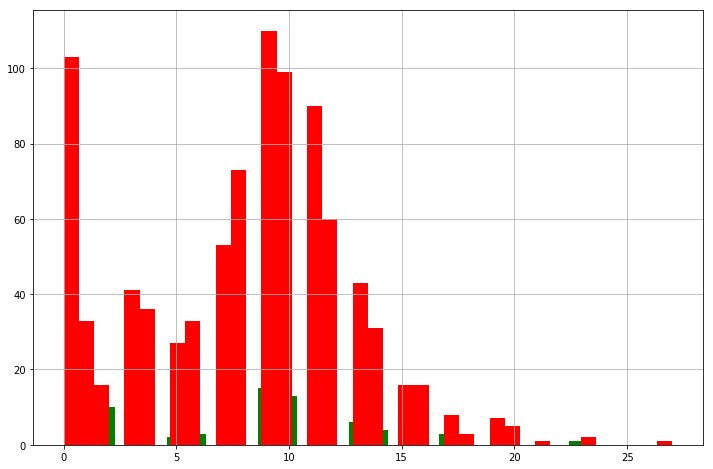

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

#plt.hist(catal['feature_3'][catal['type']== 'movie'], 40, color='blue')

plt.hist(catal['feature_3'][catal['type']=='multipart_movie'], 40, color='green')
plt.hist(catal['feature_3'][catal['type']=='series'], 40, color='red')

plt.grid()
plt.show()

Text(0, 0.5, 'feature_3')

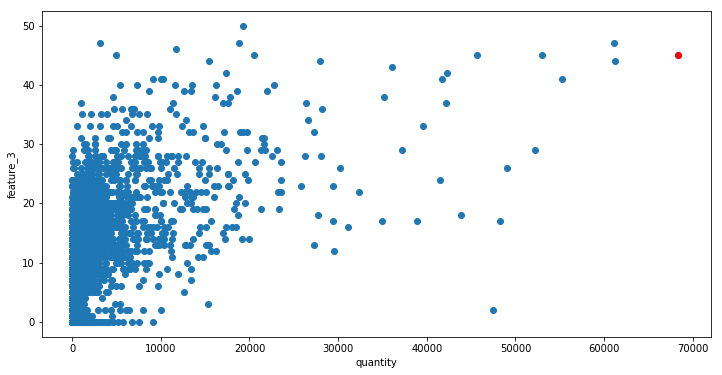

In [148]:
import matplotlib.pyplot as plt

col1 = 'quantity'
col2 = 'feature_3'

plt.figure(figsize=(12, 6))





plt.scatter(catal[col1],
            catal[col2])
plt.scatter(catal[col1][catal['quantity'] == 68320],
            catal[col2][catal['quantity'] == 68320], color='red')
plt.xlabel(col1)
plt.ylabel(col2)

In [24]:
from collections import Counter
Counter (catal['feature_5'])

Counter({0.6547073468: 4309,
         0.0: 1219,
         0.6804096966000001: 1628,
         0.4496666915: 580,
         0.5927161087: 1874,
         -1.0: 590})

In [79]:
from math import *
gcd(6804096966, 4496666915)

1

In [84]:
from collections import Counter
Counter (catal['feature_5'])

Counter({0.6547073468: 4309,
         0.0: 1219,
         0.6804096966000001: 1628,
         0.4496666915: 580,
         0.5927161087: 1874,
         -1.0: 590})

In [85]:
from collections import Counter
Counter (catal['feature_3'])

Counter({0: 1739,
         3: 375,
         4: 496,
         1: 286,
         23: 46,
         11: 643,
         7: 579,
         9: 754,
         5: 615,
         6: 635,
         2: 194,
         8: 780,
         12: 463,
         27: 30,
         35: 8,
         19: 93,
         24: 42,
         16: 173,
         10: 679,
         13: 379,
         17: 151,
         14: 302,
         31: 10,
         18: 92,
         26: 33,
         21: 56,
         15: 224,
         20: 97,
         22: 62,
         37: 6,
         32: 12,
         30: 11,
         40: 6,
         45: 6,
         25: 27,
         28: 27,
         41: 6,
         38: 4,
         29: 21,
         33: 11,
         39: 5,
         36: 7,
         44: 3,
         47: 3,
         42: 2,
         50: 1,
         46: 2,
         34: 3,
         43: 1})

In [86]:
catal[catal['feature_3']==50]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
4441,"[12006, 10221, 602, 9410, 200, 7, 29946, 31, 3...","[purchase, rent, subscription]",180,4.187097e+07,0.720355,50,1.141929,0.654707,movie


In [87]:
catal[catal['feature_3']==47]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
2639,"[2754, 50, 287, 764, 127, 7, 2763, 31, 32, 10,...","[purchase, rent, subscription]",140,4.079335e+07,0.764594,47,1.140273,0.654707,movie
3947,"[4026, 2849, 2681, 1646, 83, 7, 52, 6776, 9, 1...","[purchase, rent, subscription]",90,4.104523e+07,0.772004,47,1.140273,0.449667,movie
4786,"[3877, 2040, 2760, 6588, 7, 17505, 31, 32, 10,...","[purchase, rent, subscription]",130,3.800888e+07,0.762507,47,1.140273,0.654707,movie


In [88]:
catal[catal['feature_3']==46]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
452,"[15093, 1815, 1950, 30818, 30779, 7, 15979, 30...","[purchase, rent, subscription]",100,2.067253e+07,0.775249,46,1.133525,0.000000,movie
7868,"[1229, 4212, 5149, 24416, 24417, 7, 24418, 123...","[purchase, rent, subscription]",120,3.645571e+07,0.778864,46,1.138604,0.654707,movie


In [89]:
catal[catal['feature_3']==45]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
1398,"[5032, 5033, 1694, 1054, 764, 7, 5034, 5035, 5...","[purchase, rent, subscription]",100,3.225231e+07,0.794502,45,1.138604,0.449667,movie
2245,"[17096, 589, 6349, 1374, 7, 15250, 42, 11, 14,...","[purchase, rent, subscription]",110,4.097526e+07,0.784022,45,1.140273,0.449667,movie
2714,"[4052, 4123, 4124, 4125, 270, 4126, 1241, 42, ...","[purchase, rent, subscription]",130,4.234673e+07,0.740500,45,1.141929,0.592716,movie
3336,"[19924, 28181, 6732, 23032, 270, 24805, 43, 14...","[purchase, rent, subscription]",90,4.166108e+07,0.739609,45,1.141929,0.654707,movie
5135,"[4124, 4389, 11434, 4055, 270, 11093, 10, 54, ...","[purchase, rent, subscription]",130,3.682561e+07,0.763343,45,1.140273,0.449667,movie
6776,"[518, 3840, 629, 3841, 7, 3842, 31, 32, 10, 14...","[purchase, rent, subscription]",130,3.609190e+07,0.747988,45,1.138604,0.654707,movie


In [92]:
catal[catal['feature_3']==39]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
1636,"[1676, 6347, 8456, 67, 629, 7, 5036, 11, 1492,...","[purchase, rent, subscription]",110,1.530247e+07,0.772411,39,1.131807,0.449667,movie
1983,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[purchase, rent, subscription]",140,1.657223e+06,0.753610,39,1.119409,0.000000,movie
402,"[769, 772, 1249, 1250, 1251, 7, 1252, 31, 9, 1...","[purchase, rent, subscription]",130,7.659840e+06,0.757874,39,1.130076,0.592716,movie
4639,"[1394, 59, 1412, 716, 5084, 7, 826, 31, 10, 14...","[purchase, rent, subscription]",150,1.655886e+07,0.789495,39,1.131807,0.680410,movie
8501,"[2717, 8785, 13939, 13940, 2208, 7, 1702, 1394...","[purchase, rent, subscription]",110,6.414542e+06,0.780459,39,1.123020,0.000000,movie


In [94]:
catal[catal['feature_3']==41]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
1490,"[628, 5299, 5300, 5301, 3983, 7, 4024, 42, 124...","[purchase, rent, subscription]",110,6.190668e+06,0.792200,41,1.121222,0.592716,movie
1535,"[2059, 1476, 3099, 2003, 626, 7, 2346, 31, 32,...","[purchase, rent, subscription]",130,1.324269e+07,0.754894,41,1.131807,0.654707,movie
3783,"[1, 26, 27, 28, 29, 7, 30, 31, 32, 10, 14, 15,...","[purchase, rent, subscription]",110,3.556521e+07,0.766254,41,1.138604,0.654707,movie
4141,"[72, 15964, 1374, 2515, 7, 15965, 11, 1492, 14...","[purchase, rent, subscription]",90,3.907229e+07,0.744924,41,1.140273,0.449667,movie
4972,"[203, 1229, 162, 524, 2551, 1169, 1012, 7, 463...","[purchase, rent, subscription]",130,8.443398e+06,0.797928,41,1.130076,0.654707,movie
8493,"[48, 1908, 1441, 772, 1743, 7, 1744, 9, 10, 11...","[purchase, rent, subscription]",100,6.904265e+06,0.747552,41,1.128332,0.592716,movie


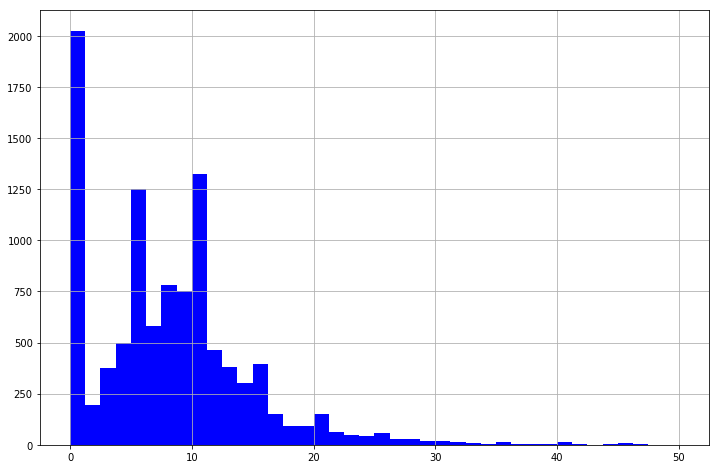

In [22]:

plt.figure(figsize=(12, 8))

plt.hist(catal['feature_3'], 40, color='blue')


plt.grid()
plt.show()

In [57]:

#coun=coun.drop(['index'], axis=1)
#

In [58]:
coun.head()

,element_uid,quantity
0,3336,45646
1,481,1473
2,4128,1414
3,6272,26571
4,5543,1099


In [60]:
catal['element_uid']=catal.index
catal=catal.reset_index()
catal.head()

,index,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid
0,0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie,0
1,1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie,1
2,10,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],100,1.666610e+07,0.700997,0,1.130076,0.654707,movie,10
3,100,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie,100
4,1000,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],80,9.115019e+06,0.689883,0,1.128332,0.680410,movie,1000


In [62]:

catal=catal.drop(['index'], axis=1)

In [63]:
catal.head()

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie,0
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie,1
2,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],100,1.666610e+07,0.700997,0,1.130076,0.654707,movie,10
3,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie,100
4,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],80,9.115019e+06,0.689883,0,1.128332,0.680410,movie,1000


In [64]:
catal=pd.merge(catal, coun, on='element_uid')

In [65]:
catal.head()

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid,quantity
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie,0,5
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie,1,9
2,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie,100,55
3,"[20576, 20577, 20578, 20579, 20580, 714, 20400...",[],70,2.517515e+07,0.602508,1,1.136924,0.000000,movie,10000,142
4,"[3778, 8159, 12371, 29312, 270, 21991, 1241, 3...","[purchase, rent, subscription]",120,1.315874e+07,0.709838,23,1.130076,0.654707,movie,10001,4


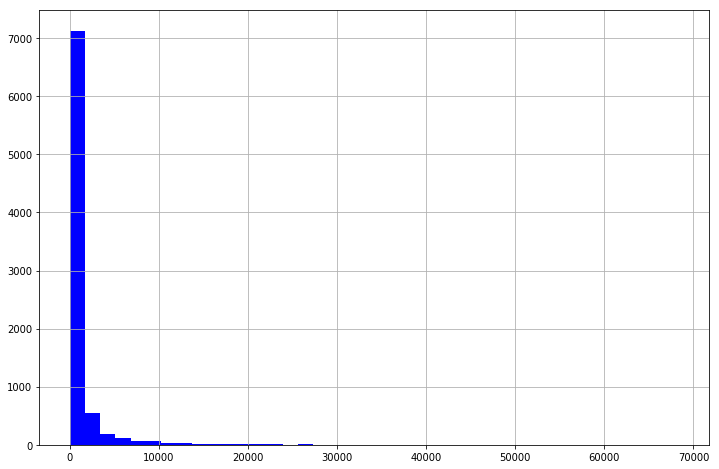

In [82]:

plt.figure(figsize=(12, 8))

plt.hist(catal['quantity'], bins=40, color='blue')


plt.grid()
plt.show()

Text(0, 0.5, 'quantity')

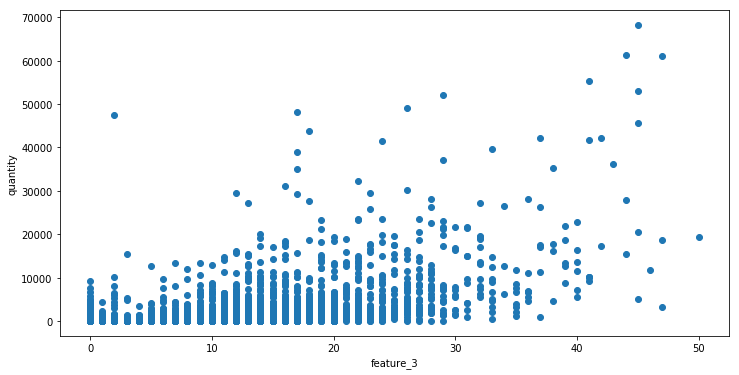

In [73]:
plt.figure(figsize=(12, 6))





plt.scatter(
           catal['feature_3'], catal['quantity'])

plt.xlabel('feature_3')
plt.ylabel('quantity')

In [74]:
max(catal['quantity'])

68320

In [155]:
catal[catal['quantity'] == 47480]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid,quantity,rating_mean
7172,"[34312, 9541, 325, 17248, 270, 34313, 42, 43, 25]",[],50,4.161910e+07,0.786378,2,1.138604,0.654707,series,8771,47480,9.346698


In [154]:
#[68320, 61272, 61119, 55228, 52942]
vvv=heapq.nlargest(20, catal['quantity'])
for i in (vvv):
    print(catal[catal['quantity'] == i])

                                             attributes  \
1690  [4052, 4123, 4124, 4125, 270, 4126, 1241, 42, ...   

                        availability  duration     feature_1  feature_2  \
1690  [purchase, rent, subscription]       130  4.234673e+07     0.7405   

      feature_3  feature_4  feature_5   type  element_uid  quantity  \
1690         45   1.141929   0.592716  movie         2714     68320   

      rating_mean  
1690     8.670018  
                                             attributes  \
6022  [4052, 4127, 4128, 4129, 270, 4130, 4131, 1241...   

                        availability  duration     feature_1  feature_2  \
6022  [purchase, rent, subscription]       120  4.195494e+07    0.77363   

      feature_3  feature_4  feature_5   type  element_uid  quantity  \
6022         44   1.140273   0.449667  movie          747     61272   

      rating_mean  
6022     8.930678  
                                             attributes  \
1615  [2754, 50, 287, 764, 127, 7, 

5780     8.857282  
                                            attributes  \
628  [3704, 6634, 6635, 4389, 270, 6636, 130, 42, 1...   

                       availability  duration     feature_1  feature_2  \
628  [purchase, rent, subscription]       110  4.216483e+07   0.718466   

     feature_3  feature_4  feature_5   type  element_uid  quantity  \
628         38   1.141929   0.592716  movie         1521     35168   

     rating_mean  
628     8.304816  


In [79]:
catal[catal['duration'] == 290]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid,quantity
2090,"[3843, 3835, 3844, 2538, 2278, 7, 3845, 31, 32...","[purchase, rent]",290,4.104606e+07,0.732851,20,1.140273,0.654707,movie,3152,2776


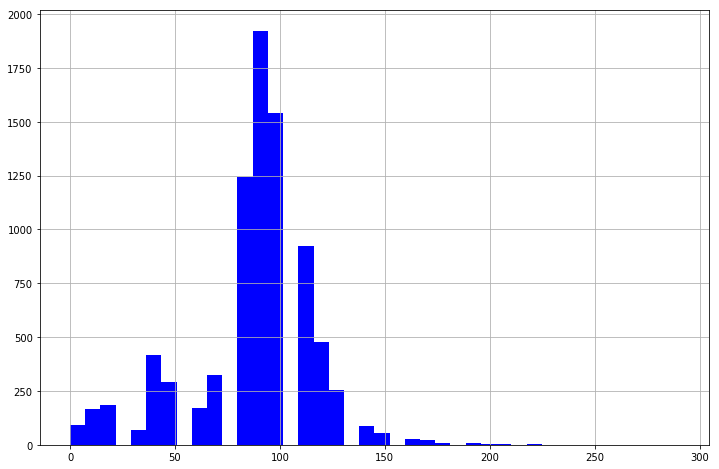

In [83]:

plt.figure(figsize=(12, 8))

plt.hist(catal['duration'], bins=40, color='blue')


plt.grid()
plt.show()

In [84]:
import heapq
largest_integers = heapq.nlargest(5, catal['duration'])

In [85]:
largest_integers

[290, 230, 220, 220, 210]

In [97]:
catal[catal['duration'] == 210]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid,quantity,rating_mean
92,"[6812, 6813, 6814, 6815, 6816, 7, 6817, 6818, ...","[purchase, subscription]",210,6.372565e+06,0.797549,17,0.949953,0.592716,movie,10100,1965,9.367347
274,"[6828, 3850, 6843, 10380, 11080, 52, 6830, 130...","[purchase, rent]",210,1.273898e+07,0.783234,11,1.023886,0.000000,movie,1127,44,8.800000
4302,"[677, 613, 697, 216, 127, 7, 8631, 8632, 31, 3...","[purchase, rent]",210,4.304614e+07,0.779663,28,1.141929,0.654707,movie,5616,28122,8.768443


In [89]:
largest_integers2 = heapq.nlargest(5, catal['quantity'])

In [90]:
largest_integers2

[68320, 61272, 61119, 55228, 52942]

In [91]:
catal[catal['quantity'] == 61272]

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid,quantity
6022,"[4052, 4127, 4128, 4129, 270, 4130, 4131, 1241...","[purchase, rent, subscription]",120,4.195494e+07,0.77363,44,1.140273,0.449667,movie,747,61272


In [92]:
catal["rating_mean"] = catal.element_uid.map(ratings.groupby("element_uid").rating.mean())

In [93]:
catal.head()

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid,quantity,rating_mean
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie,0,5,NaN
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie,1,9,NaN
2,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie,100,55,10.0
3,"[20576, 20577, 20578, 20579, 20580, 714, 20400...",[],70,2.517515e+07,0.602508,1,1.136924,0.000000,movie,10000,142,7.9
4,"[3778, 8159, 12371, 29312, 270, 21991, 1241, 3...","[purchase, rent, subscription]",120,1.315874e+07,0.709838,23,1.130076,0.654707,movie,10001,4,10.0


Text(0, 0.5, 'feature_3')

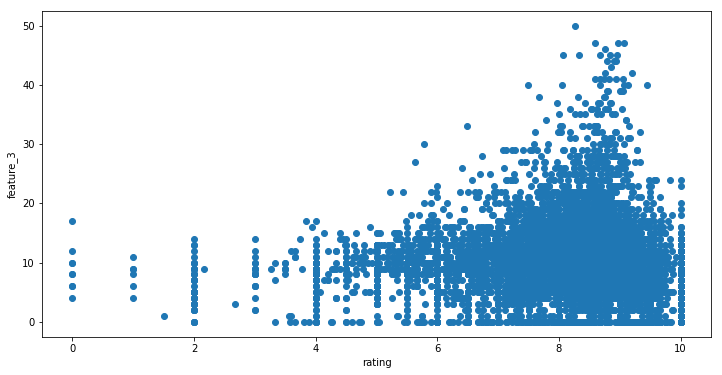

In [96]:
plt.figure(figsize=(12, 6))





plt.scatter(
           catal['rating_mean'], catal['feature_3'])

plt.xlabel('rating')
plt.ylabel('feature_3')

In [99]:
Counter(catal['availability'])

TypeError: unhashable type: 'list'

In [100]:
catal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8295
Data columns (total 12 columns):
attributes      8296 non-null object
availability    8296 non-null object
duration        8296 non-null int64
feature_1       8296 non-null float64
feature_2       8296 non-null float64
feature_3       8296 non-null int64
feature_4       8296 non-null float64
feature_5       8296 non-null float64
type            8296 non-null object
element_uid     8296 non-null int64
quantity        8296 non-null int64
rating_mean     7145 non-null float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.1+ MB


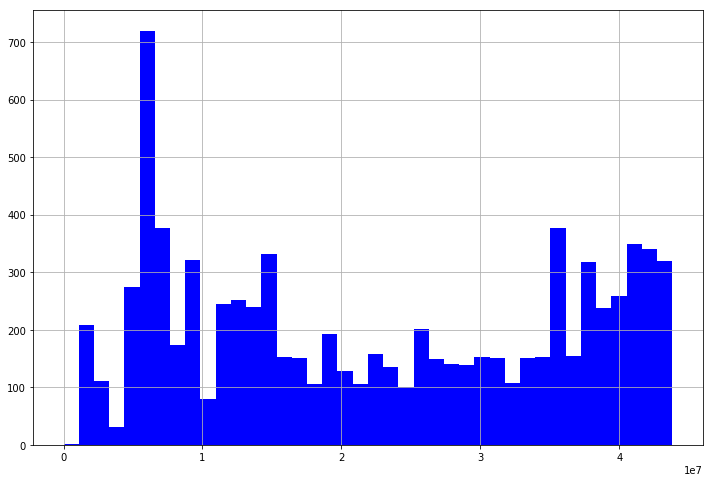

In [101]:

plt.figure(figsize=(12, 8))

plt.hist(catal['feature_1'], 40, color='blue')


plt.grid()
plt.show()

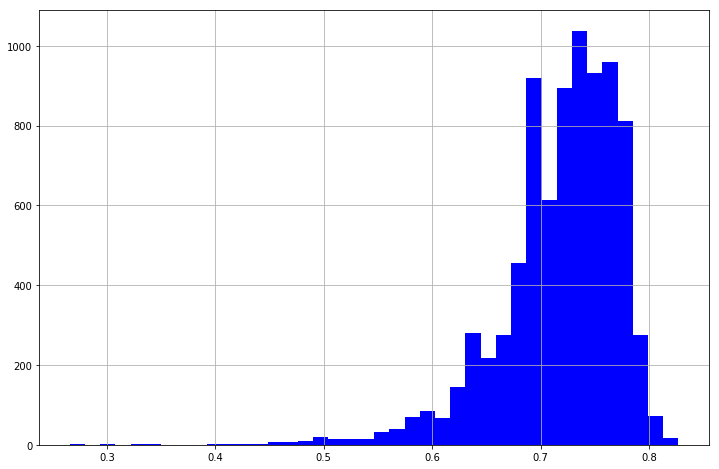

In [102]:

plt.figure(figsize=(12, 8))

plt.hist(catal['feature_2'], 40, color='blue')


plt.grid()
plt.show()

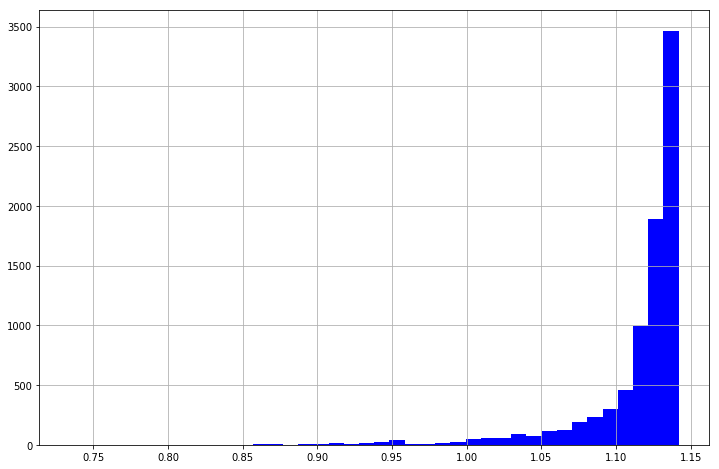

In [103]:

plt.figure(figsize=(12, 8))

plt.hist(catal['feature_4'], 40, color='blue')


plt.grid()
plt.show()

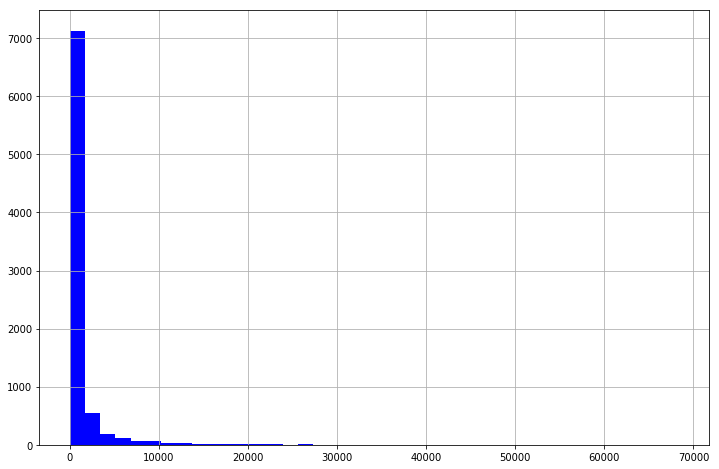

In [121]:

plt.figure(figsize=(12, 8))

plt.hist(catal['quantity'], 40, color='blue')


plt.grid()
plt.show()

Text(0, 0.5, 'feature_2')

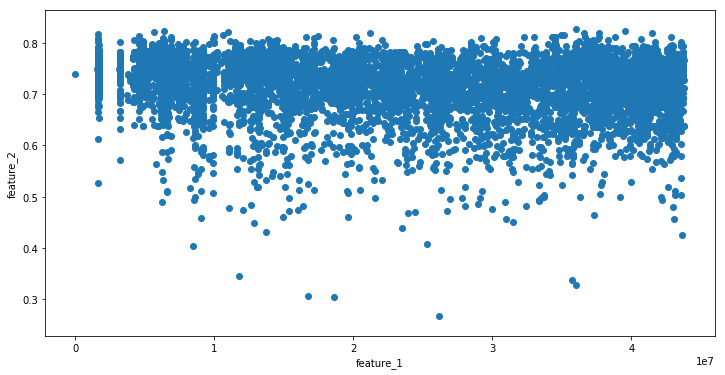

In [162]:
plt.figure(figsize=(12, 6))





plt.scatter(
           catal['feature_1'], catal['feature_2'])

plt.xlabel('feature_1')
plt.ylabel('feature_2')

In [23]:
catal.head()

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie
10,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],100,1.666610e+07,0.700997,0,1.130076,0.654707,movie
100,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie
1000,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],80,9.115019e+06,0.689883,0,1.128332,0.680410,movie


In [24]:
catal_exp=catal

In [27]:
from collections import Counter
coun = pd.DataFrame.from_dict(Counter(transactions['element_uid']), orient='index')
coun['element_uid']=coun.index
coun['quantity']=coun[0]

coun=coun.reset_index()

coun=coun.drop(['index'], axis=1)
catal['element_uid']=catal.index
catal_exp=catal_exp.reset_index()

catal_exp=catal_exp.drop(['index'], axis=1)

catal_exp.head()



,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie,0
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie,1
2,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],100,1.666610e+07,0.700997,0,1.130076,0.654707,movie,10
3,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie,100
4,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],80,9.115019e+06,0.689883,0,1.128332,0.680410,movie,1000


In [30]:


coun=coun.drop([0], axis=1)
coun.head()


,element_uid,quantity
0,3336,45646
1,481,1473
2,4128,1414
3,6272,26571
4,5543,1099


In [31]:
catal_exp=pd.merge(catal_exp, coun, on='element_uid')


In [33]:
catal_exp["rating_mean"] = catal_exp.element_uid.map(ratings.groupby("element_uid").rating.mean())
catal_exp.head()

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid,quantity,rating_mean
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie,0,5,NaN
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie,1,9,NaN
2,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie,100,55,10.0
3,"[20576, 20577, 20578, 20579, 20580, 714, 20400...",[],70,2.517515e+07,0.602508,1,1.136924,0.000000,movie,10000,142,7.9
4,"[3778, 8159, 12371, 29312, 270, 21991, 1241, 3...","[purchase, rent, subscription]",120,1.315874e+07,0.709838,23,1.130076,0.654707,movie,10001,4,10.0


In [34]:
catal_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8295
Data columns (total 12 columns):
attributes      8296 non-null object
availability    8296 non-null object
duration        8296 non-null int64
feature_1       8296 non-null float64
feature_2       8296 non-null float64
feature_3       8296 non-null int64
feature_4       8296 non-null float64
feature_5       8296 non-null float64
type            8296 non-null object
element_uid     8296 non-null int64
quantity        8296 non-null int64
rating_mean     7145 non-null float64
dtypes: float64(5), int64(4), object(3)
memory usage: 842.6+ KB


In [38]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438790 entries, 0 to 438789
Data columns (total 4 columns):
user_uid       438790 non-null category
element_uid    438790 non-null category
rating         438790 non-null uint8
ts             438790 non-null float64
dtypes: category(2), float64(1), uint8(1)
memory usage: 12.4 MB


In [39]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643012 entries, 0 to 9643011
Data columns (total 7 columns):
element_uid            uint16
user_uid               uint32
consumption_mode       category
ts                     float64
watched_time           uint64
device_type            uint8
device_manufacturer    uint8
dtypes: category(1), float64(1), uint16(1), uint32(1), uint64(1), uint8(2)
memory usage: 229.9 MB


In [65]:
transactions_exp=pd.merge( transactions, ratings, how='left', on=['element_uid', 'user_uid'])
transactions_exp=pd.merge( transactions_exp, catal_exp, on=['element_uid'])

In [37]:
transactions_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643012 entries, 0 to 9643011
Data columns (total 20 columns):
element_uid            object
user_uid               object
consumption_mode       category
ts_x                   float64
watched_time           uint64
device_type            uint8
device_manufacturer    uint8
rating                 float64
ts_y                   float64
attributes             object
availability           object
duration               int64
feature_1              float64
feature_2              float64
feature_3              int64
feature_4              float64
feature_5              float64
type                   object
quantity               int64
rating_mean            float64
dtypes: category(1), float64(8), int64(3), object(5), uint64(1), uint8(2)
memory usage: 1.3+ GB


In [66]:
transactions_exp.head()

,element_uid,user_uid,consumption_mode,ts_x,watched_time,device_type,device_manufacturer,rating,ts_y,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,quantity,rating_mean
0,3336,5177,S,4.430518e+07,4282,0,50,9.0,4.430415e+07,"[19924, 28181, 6732, 23032, 270, 24805, 43, 14...","[purchase, rent, subscription]",90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
1,3336,349202,S,4.430503e+07,3291,0,50,NaN,NaN,"[19924, 28181, 6732, 23032, 270, 24805, 43, 14...","[purchase, rent, subscription]",90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
2,3336,117582,S,4.430488e+07,5727,3,99,NaN,NaN,"[19924, 28181, 6732, 23032, 270, 24805, 43, 14...","[purchase, rent, subscription]",90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
3,3336,523833,S,4.430484e+07,4346,5,31,NaN,NaN,"[19924, 28181, 6732, 23032, 270, 24805, 43, 14...","[purchase, rent, subscription]",90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
4,3336,571064,S,4.430465e+07,4568,0,99,NaN,NaN,"[19924, 28181, 6732, 23032, 270, 24805, 43, 14...","[purchase, rent, subscription]",90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548


In [67]:
transactions_exp=transactions_exp.drop(['ts_x', 'ts_y', 'device_manufacturer', 'device_type', 'attributes', 'availability'],1)
transactions_exp['watched_time']=transactions_exp['watched_time']/60


In [68]:
transactions_exp.head()


,element_uid,user_uid,consumption_mode,watched_time,rating,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,quantity,rating_mean
0,3336,5177,S,71.366667,9.0,90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
1,3336,349202,S,54.850000,NaN,90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
2,3336,117582,S,95.450000,NaN,90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
3,3336,523833,S,72.433333,NaN,90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548
4,3336,571064,S,76.133333,NaN,90,4.166108e+07,0.739609,45,1.141929,0.654707,movie,45646,8.328548


In [69]:

dct1={'S' : 1, 'P' : 0, 'R' : 0}
dct2={'S' : 0, 'P' : 1, 'R' : 0}
dct3={'S' : 0, 'P' : 0, 'R' : 1}
transactions_exp['CM_S']=transactions_exp['consumption_mode'].map(dct1)
transactions_exp['CM_P']=transactions_exp['consumption_mode'].map(dct2)
transactions_exp['CM_R']=transactions_exp['consumption_mode'].map(dct3)
transactions_exp = transactions_exp.drop(['consumption_mode'], 1) 


In [70]:


dct1={0.6547073468 : 1, 0.0 : 0, 0.6804096966000001 : 0, 0.5927161087 : 0, -1.0 :0, 0.4496666915 :0 }
dct2={0.6547073468 : 0, 0.0 : 1, 0.6804096966000001 : 0, 0.5927161087 : 0, -1.0 :0, 0.4496666915 :0}
dct3={0.6547073468 : 0, 0.0 : 0, 0.6804096966000001 : 1, 0.5927161087 : 0, -1.0 :0, 0.4496666915 :0}
dct4={0.6547073468 : 0, 0.0 : 0, 0.6804096966000001 : 0, 0.5927161087 : 1, -1.0 :0, 0.4496666915 :0}
dct5={0.6547073468 : 0, 0.0 : 0, 0.6804096966000001 : 0, 0.5927161087 : 0, -1.0 :1, 0.4496666915 :0}
dct6={0.6547073468 : 0, 0.0 : 0, 0.6804096966000001 : 0, 0.5927161087 : 0, -1.0 :0, 0.4496666915 :1}
transactions_exp['feature_5_65']=transactions_exp['feature_5'].map(dct1)
transactions_exp['feature_5_00']=transactions_exp['feature_5'].map(dct2)
transactions_exp['feature_5_68']=transactions_exp['feature_5'].map(dct3)
transactions_exp['feature_5_59']=transactions_exp['feature_5'].map(dct4)
transactions_exp['feature_5_-1']=transactions_exp['feature_5'].map(dct5)

transactions_exp['feature_5_44']=transactions_exp['feature_5'].map(dct6)
transactions_exp = transactions_exp.drop(['feature_5'], 1) 

transactions_exp['smallf3']= transactions_exp['feature_3'].map(lambda x: 1 if x <18  else 0)
transactions_exp['middlef3']=transactions_exp['feature_3'].map(lambda x: 1 if (x >17 and x <33)  else 0)
transactions_exp['bigf3']=transactions_exp['feature_3'].map(lambda x: 1 if x >32  else 0)

transactions_exp['type_m']= transactions_exp['type'].map(lambda x: 1 if x == 'movie' else 0)  

transactions_exp['type_s']= transactions_exp['type'].map(lambda x: 1 if x == 'series' else 0)

transactions_exp['type_mm']= transactions_exp['type'].map(lambda x: 1 if x == 'multipart_movie' else 0)

transactions_exp = transactions_exp.drop(['type'], 1) 

In [71]:
transactions_exp.head()

,element_uid,user_uid,watched_time,rating,duration,feature_1,feature_2,feature_3,feature_4,quantity,...,feature_5_68,feature_5_59,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,type_m,type_s,type_mm
0,3336,5177,71.366667,9.0,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
1,3336,349202,54.850000,NaN,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
2,3336,117582,95.450000,NaN,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
3,3336,523833,72.433333,NaN,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
4,3336,571064,76.133333,NaN,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0


In [72]:
transactions_exp['feature_5_65']=transactions_exp['feature_5_65'].astype(np.int16)
transactions_exp['feature_5_00']=transactions_exp['feature_5_00'].astype(np.int16)
transactions_exp['feature_5_68']=transactions_exp['feature_5_68'].astype(np.int16)
transactions_exp['feature_5_59']=transactions_exp['feature_5_59'].astype(np.int16)
transactions_exp['feature_5_-1']=transactions_exp['feature_5_-1'].astype(np.int16)
transactions_exp['smallf3']= transactions_exp['smallf3'].astype(np.int16)
transactions_exp['middlef3']=transactions_exp['middlef3'].astype(np.int16)
transactions_exp['bigf3']=transactions_exp['bigf3'].astype(np.int16)

transactions_exp['type_m']=transactions_exp['type_m'].astype(np.int16)

transactions_exp['type_s']=transactions_exp['type_s'].astype(np.int16)

transactions_exp['type_mm']= transactions_exp['type_mm'].astype(np.int16)

transactions_exp['feature_3']=transactions_exp['feature_3'].astype(np.int16)

transactions_exp['duration']=transactions_exp['duration'].astype(np.int16)

transactions_exp['element_uid']=transactions_exp['element_uid'].astype(np.int32)
transactions_exp['user_uid']=transactions_exp['user_uid'].astype(np.int32)


In [87]:
transactions_exp['rating']=transactions_exp['rating'].astype(np.int16)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [73]:
transactions_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643012 entries, 0 to 9643011
Data columns (total 26 columns):
element_uid     int32
user_uid        int32
watched_time    float64
rating          float64
duration        int16
feature_1       float64
feature_2       float64
feature_3       int16
feature_4       float64
quantity        int64
rating_mean     float64
CM_S            int64
CM_P            int64
CM_R            int64
feature_5_65    int16
feature_5_00    int16
feature_5_68    int16
feature_5_59    int16
feature_5_-1    int16
feature_5_44    int64
smallf3         int16
middlef3        int16
bigf3           int16
type_m          int16
type_s          int16
type_mm         int16
dtypes: float64(6), int16(13), int32(2), int64(5)
memory usage: 1.2 GB


In [75]:
print(transactions_exp.isnull().sum())


element_uid           0
user_uid              0
watched_time          0
rating          9285669
duration              0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
quantity              0
rating_mean       52554
CM_S                  0
CM_P                  0
CM_R                  0
feature_5_65          0
feature_5_00          0
feature_5_68          0
feature_5_59          0
feature_5_-1          0
feature_5_44          0
smallf3               0
middlef3              0
bigf3                 0
type_m                0
type_s                0
type_mm               0
dtype: int64


In [77]:
transactions_exp.rating_mean=transactions_exp.rating_mean.fillna(6.0)

In [76]:
transactions_exp.to_csv(os.path.join(DATA_PATH, 'transactions_exp.csv'))

In [1]:
import os
import json
import pandas as pd
import numpy as np
import tqdm
import scipy.sparse as sp

DATA_PATH = 'D:\download'
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)

In [4]:
transactions_exp['feature_5_65']=transactions_exp['feature_5_65'].astype(np.int16)
transactions_exp['feature_5_00']=transactions_exp['feature_5_00'].astype(np.int16)
transactions_exp['feature_5_68']=transactions_exp['feature_5_68'].astype(np.int16)
transactions_exp['feature_5_59']=transactions_exp['feature_5_59'].astype(np.int16)
transactions_exp['feature_5_-1']=transactions_exp['feature_5_-1'].astype(np.int16)
transactions_exp['smallf3']= transactions_exp['smallf3'].astype(np.int16)
transactions_exp['middlef3']=transactions_exp['middlef3'].astype(np.int16)
transactions_exp['bigf3']=transactions_exp['bigf3'].astype(np.int16)

transactions_exp['type_m']=transactions_exp['type_m'].astype(np.int16)

transactions_exp['type_s']=transactions_exp['type_s'].astype(np.int16)

transactions_exp['type_mm']= transactions_exp['type_mm'].astype(np.int16)

transactions_exp['feature_3']=transactions_exp['feature_3'].astype(np.int16)

transactions_exp['duration']=transactions_exp['duration'].astype(np.int16)

transactions_exp['element_uid']=transactions_exp['element_uid'].astype(np.int32)
transactions_exp['user_uid']=transactions_exp['user_uid'].astype(np.int32)

In [5]:
transactions_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643012 entries, 0 to 9643011
Data columns (total 27 columns):
Unnamed: 0      int64
element_uid     int32
user_uid        int32
watched_time    float64
rating          float64
duration        int16
feature_1       float64
feature_2       float64
feature_3       int16
feature_4       float64
quantity        int64
rating_mean     float64
CM_S            int64
CM_P            int64
CM_R            int64
feature_5_65    int16
feature_5_00    int16
feature_5_68    int16
feature_5_59    int16
feature_5_-1    int16
feature_5_44    int64
smallf3         int16
middlef3        int16
bigf3           int16
type_m          int16
type_s          int16
type_mm         int16
dtypes: float64(6), int16(13), int32(2), int64(6)
memory usage: 1.2 GB


In [6]:
X_train = transactions_exp[~transactions_exp.rating.isnull()]
X_train=X_train.drop(['rating'],1)
X_test = transactions_exp[transactions_exp.rating.isnull()]
X_test=X_test.drop(['rating'],1)
y_train = transactions_exp[~transactions_exp.rating.isnull()].rating.astype(np.int16)
y_test = transactions_exp[transactions_exp.rating.isnull()].rating

In [7]:
X_train.head()

,Unnamed: 0,element_uid,user_uid,watched_time,duration,feature_1,feature_2,feature_3,feature_4,quantity,...,feature_5_68,feature_5_59,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,type_m,type_s,type_mm
0,0,3336,5177,71.366667,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
10,10,3336,12353,4.650000,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
43,43,3336,86893,95.450000,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
57,57,3336,419459,96.366667,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0
67,67,3336,184988,98.266667,90,4.166108e+07,0.739609,45,1.141929,45646,...,0,0,0,0,0,0,1,1,0,0


In [8]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=10, shuffle=True, random_state=241) 


grid = {'n_estimators': [150,175,200,225,250,275,300,325,350,400,425,450,475,500]}
model = RandomForestRegressor( max_depth=4, random_state=241)
gs = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
gs.fit(X_train, y_train)

Cb=gs.best_params_['n_estimators']
Sb=gs.best_score_ 
print (Cb, Sb, 'это поиск по деревьям')


grid1 = {'max_depth': [4,5,6,7,8,9,10]}
model1 = RandomForestRegressor( n_estimators=Cb, random_state=241)
gs1 = GridSearchCV(model1, grid1, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
gs1.fit(X_train, y_train)
Cb1=gs1.best_params_['max_depth']
Sb1=gs1.best_score_
print (Cb1, Sb1, 'это поиск по глубине')

model2 = RandomForestRegressor( n_estimators=Cb, max_depth=Cb1, random_state=241)
model2=model2.fit(X_train, y_train)
submit = pd.DataFrame(model2.predict(X_test), columns=["draw", "win", "lose"])
submit.to_csv(os.path.join(DATA_PATH, 'halfsubmit1.csv'))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


500 -3.352478765771442 это поиск по деревьям
8 -3.3362227311897 это поиск по глубине


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [10]:

print (Cb, Cb1)

500 8


In [16]:
X_test.rating_mean=X_test.rating_mean.fillna(6.0)

In [17]:


model2 = RandomForestRegressor( n_estimators=Cb, max_depth=Cb1, random_state=241)
model2=model2.fit(X_train, y_train)
submit = pd.DataFrame(model2.predict(X_test))
submit.to_csv(os.path.join(DATA_PATH, 'halfsubmit1.csv'))

In [4]:
submit=pd.read_csv(
    os.path.join(DATA_PATH, 'halfsubmit1.csv'),
    
)

In [33]:
importances = model2.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names=X_train.columns
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))


Feature importances:
 1. feature 'rating_mean' (0.9343)
 2. feature 'watched_time' (0.0372)
 3. feature 'user_uid' (0.0069)
 4. feature 'Unnamed: 0' (0.0056)
 5. feature 'feature_2' (0.0034)
 6. feature 'feature_1' (0.0027)
 7. feature 'duration' (0.0027)
 8. feature 'element_uid' (0.0018)
 9. feature 'quantity' (0.0013)
10. feature 'feature_4' (0.0009)
11. feature 'feature_3' (0.0009)
12. feature 'CM_S ' (0.0004)
13. feature 'CM_P ' (0.0003)
14. feature 'CM_R ' (0.0003)
15. feature 'feature_5_44' (0.0002)
16. feature 'type_mm' (0.0002)
17. feature 'feature_5_59' (0.0001)
18. feature 'feature_5_00' (0.0001)
19. feature 'type_m' (0.0001)
20. feature 'type_s' (0.0001)
21. feature 'feature_5_65' (0.0001)
22. feature 'feature_5_68' (0.0001)
23. feature 'feature_5_-1' (0.0001)
24. feature 'bigf3' (0.0000)
25. feature 'middlef3' (0.0000)
26. feature 'smallf3' (0.0000)


In [24]:
submit[0]=submit[0].round()
submit[0]=submit[0].astype(np.int16)


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9285669 entries, 1 to 9643011
Data columns (total 26 columns):
Unnamed: 0      int64
element_uid     int64
user_uid        int64
watched_time    float64
duration        int64
feature_1       float64
feature_2       float64
feature_3       int64
feature_4       float64
quantity        int64
rating_mean     float64
CM_S            int64
CM_P            int64
CM_R            int64
feature_5_65    int64
feature_5_00    int64
feature_5_68    int64
feature_5_59    int64
feature_5_-1    int64
feature_5_44    int64
smallf3         int64
middlef3        int64
bigf3           int64
type_m          int64
type_s          int64
type_mm         int64
dtypes: float64(5), int64(21)
memory usage: 1.9 GB


In [8]:
X_test=X_test.drop([

'watched_time',    
'duration'  ,      
'feature_1'  ,    
'feature_2'  ,   
'feature_3'  ,   
'feature_4'  ,   
'quantity'  ,    
'rating_mean'  , 
'CM_S'  ,        
'CM_P',  
'CM_R'  ,        
'feature_5_65' , 
'feature_5_00'  ,
'feature_5_68'  ,
'feature_5_59'  ,
'feature_5_-1'  ,
'feature_5_44'  ,
'smallf3' ,      
'middlef3'  ,    
'bigf3',         
'type_m',     
'type_s'  ,      
'type_mm' ], 1)

In [9]:
X_test=X_test.drop(['Unnamed: 0'],1)

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9285669 entries, 1 to 9643011
Data columns (total 2 columns):
element_uid    int64
user_uid       int64
dtypes: int64(2)
memory usage: 212.5 MB


In [11]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9285669 entries, 0 to 9285668
Data columns (total 2 columns):
Unnamed: 0    int64
0             float64
dtypes: float64(1), int64(1)
memory usage: 141.7 MB


In [12]:
X_test=X_test.reset_index()

In [13]:
X_test=X_test.drop(['index'], 1)

In [29]:
OLD=pd.concat([X_test, submit], 1)
OLD.rating=OLD.rating.round()
OLD['rating']=OLD['0']
OLD=OLD.drop(['0','Unnamed: 0'],1)
ratings=ratings.drop(['ts'],1)

In [32]:
OLD.rating=OLD.rating.round()

In [30]:
OLD['rating']=OLD['0']

In [31]:
OLD=OLD.drop(['0','Unnamed: 0'],1)

In [34]:
ratings=ratings.drop(['ts'],1)

ValueError: labels ['ts'] not contained in axis

In [33]:
OLD.head()

,element_uid,user_uid,rating
0,3336,349202,8.0
1,3336,117582,8.0
2,3336,523833,8.0
3,3336,571064,8.0
4,3336,295727,8.0


In [73]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438790 entries, 0 to 438789
Data columns (total 3 columns):
user_uid       438790 non-null uint32
element_uid    438790 non-null uint16
rating         438790 non-null uint8
dtypes: uint16(1), uint32(1), uint8(1)
memory usage: 2.9 MB


In [35]:
OLD2 = OLD.append(ratings)

In [36]:
OLD2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724459 entries, 0 to 438789
Data columns (total 3 columns):
element_uid    int64
rating         float64
user_uid       int64
dtypes: float64(1), int64(2)
memory usage: 296.8 MB


100%|████████████████████████████| 9643012/9643012 [00:15<00:00, 611288.23it/s]


Sparsity: 0.002243


100%|██████████████████████████████████| 50000/50000 [00:14<00:00, 3489.71it/s]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train = transactions_exp[~transactions_exp.rating.isnull()]
X_train=X_train.drop(['rating'],1)
X_test = transactions_exp[transactions_exp.rating.isnull()]
X_test=X_test.drop(['rating'],1)
y_train = transactions_exp[~transactions_exp.rating.isnull()].rating.astype(np.int16)
y_test = transactions_exp[transactions_exp.rating.isnull()].rating

grid3 = {'n_neighbors': [50,111,222,333]}

neigh = KNeighborsRegressor()
gs3 = GridSearchCV(neigh, grid3, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
gs3.fit(X_train, y_train)
Cb3=gs3.best_params_['n_neighbors']
Sb3=gs3.best_score_
print (Cb3, Sb3, 'это поиск по соседям')